When Michelangelo was asked how he could sculpt a work of art as masterful as his
David, he is famously reported to have said, “It is easy. You just chip away the stone
that doesn’t look like David.”

Although web scraping is unlike marble sculpting in most other respects, you must
take a similar attitude when it comes to extracting the information you’re seeking
from complicated web pages. In this chapter, we’ll explore various techniques to chip
away any content that doesn’t look like content you want, until you arrive at the information
you’re seeking. Complicated HTML pages may be look intimidating at first,
but just keep chipping!

### Another Serving of BeautifulSoup

In Chapter 4, you took a quick look at installing and running BeautifulSoup, as well
as selecting objects one at a time. In this section, we’ll discuss searching for tags by
attributes, working with lists of tags, and navigating parse trees.

Nearly every website you encounter contains stylesheets. Stylesheets are created so
that web browsers can render HTML into colorful and aesthetically pleasing designs
for humans. You might think of this styling layer as, at the very least, perfectly ignorable
for web scrapers—but not so fast! CSS is, in fact, a huge boon for web scrapers
because it requires the differentiation of HTML elements in order to style them
differently.

CSS provides an incentive for web developers to add tags to HTML elements they
might have otherwise left with the exact same markup. Some tags might look like this:

```
<span class="green"></span>
```

Others look like this:

```
<span class="red"></span>
```

Web scrapers can easily separate these two tags based on their class; for example, they
might use BeautifulSoup to grab all the red text but none of the green text. Because
CSS relies on these identifying attributes to style sites appropriately, you are almost
guaranteed that these class and id attributes will be plentiful on most modern
websites.

Let’s create an example web scraper that scrapes the page located at http://www.pythonscraping.com/pages/warandpeace.html

On this page, the lines spoken by characters in the story are in red, whereas the
names of characters are in green. You can see the span tags, which reference the
appropriate CSS classes, in the following sample of the page’s source code:

```
<span class="red">Heavens! what a virulent attack!</span> replied
<span class="green">the prince</span>, not in the least disconcerted
by this reception.
```
You can grab the entire page and create a BeautifulSoup object with it by using a
program similar to the one used in Chapter 4:

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

html = urlopen('http://www.pythonscraping.com/pages/warandpeace.html')
bs = BeautifulSoup(html.read(), 'html.parser')

Using this BeautifulSoup object, you can use the find_all function to extract a
Python list of proper nouns found by selecting only the text within `<span class="green"></span>` tags (find_all is an extremely flexible function you’ll be
using a lot later in this book):

In [2]:
nameList = bs.find_all('span', {'class':'green'})
for name in nameList:
    print(name.get_text())

Anna
Pavlovna Scherer
Empress Marya
Fedorovna
Prince Vasili Kuragin
Anna Pavlovna
St. Petersburg
the prince
Anna Pavlovna
Anna Pavlovna
the prince
the prince
the prince
Prince Vasili
Anna Pavlovna
Anna Pavlovna
the prince
Wintzingerode
King of Prussia
le Vicomte de Mortemart
Montmorencys
Rohans
Abbe Morio
the Emperor
the prince
Prince Vasili
Dowager Empress Marya Fedorovna
the baron
Anna Pavlovna
the Empress
the Empress
Anna Pavlovna's
Her Majesty
Baron
Funke
The prince
Anna
Pavlovna
the Empress
The prince
Anatole
the prince
The prince
Anna
Pavlovna
Anna Pavlovna


When run, it should list all the proper nouns in the text, in the order they appear in
War and Peace. How does it work? Previously, you’ve called bs.tagName to get the
first occurrence of that tag on the page. Now, you’re calling bs.find_all(tagName,
tagAttributes) to get a list of all of the tags on the page, rather than just the first.

After getting a list of names, the program iterates through all names in the list and
prints name.get_text() in order to separate the content from the tags.

### When to get_text() and When to Preserve Tags

.get_text() strips all tags from the document you are working
with and returns a Unicode string containing the text only. For
example, if you are working with a large block of text that contains
many hyperlinks, paragraphs, and other tags, all those will be stripped
away, and you’ll be left with a tagless block of text.

Keep in mind that it’s much easier to find what you’re looking for
in a BeautifulSoup object than in a block of text. Calling
.get_text() should always be the last thing you do, immediately
before you print, store, or manipulate your final data. In
general, you should try to preserve the tag structure of a document
as long as possible.

### find() and find_all() with BeautifulSoup

BeautifulSoup’s find() and find_all() are the two functions you will likely use the
most. With them, you can easily filter HTML pages to find lists of desired tags, or a
single tag, based on their various attributes.

The two functions are extremely similar, as evidenced by their definitions in the
BeautifulSoup documentation:

`find_all(tag, attrs, recursive, text, limit, **kwargs)`
`find(tag, attrs, recursive, text, **kwargs)`

In all likelihood, 95% of the time you will need to use only the first two arguments:
tag and attrs. However, let’s take a look at all the parameters in greater detail.

The tag parameter is one that you’ve seen before; you can pass a string name of a tag
or even a Python list of string tag names. For example, the following returns a list of
all the header tags in a document:

In [3]:
bs.find_all(['h1', 'h2', 'h3', 'h4', 'h5', 'h6'])

[<h1>War and Peace</h1>, <h2>Chapter 1</h2>]

Unlike the tag parameter, which can be either a string or an iterable, the attrs
parameter must be a Python dictionary of attributes and values. It matches tags that
contain any one of those attributes. For example, the following function would return
both the green and red span tags in the HTML document:

In [4]:
bs.find_all('span', {'class': ['green', 'red']})

[<span class="red">Well, Prince, so Genoa and Lucca are now just family estates of the
 Buonapartes. But I warn you, if you don't tell me that this means war,
 if you still try to defend the infamies and horrors perpetrated by
 that Antichrist- I really believe he is Antichrist- I will have
 nothing more to do with you and you are no longer my friend, no longer
 my 'faithful slave,' as you call yourself! But how do you do? I see
 I have frightened you- sit down and tell me all the news.</span>,
 <span class="green">Anna
 Pavlovna Scherer</span>,
 <span class="green">Empress Marya
 Fedorovna</span>,
 <span class="green">Prince Vasili Kuragin</span>,
 <span class="green">Anna Pavlovna</span>,
 <span class="green">St. Petersburg</span>,
 <span class="red">If you have nothing better to do, Count [or Prince], and if the
 prospect of spending an evening with a poor invalid is not too
 terrible, I shall be very charmed to see you tonight between 7 and 10-
 Annette Scherer.</span>,
 <span clas

The recursive parameter is a boolean. How deeply into the document do you want
to go? If recursive is set to True, the find_all function looks into children, and children’s children, etc., for tags that match the parameters. If it is False, it will look
only at the top-level tags in your document. By default, find_all works recursively
(recursive is set to True). In general, it’s a good idea to leave this as is, unless you
really know what you need to do and performance is an issue.

The text parameter is unusual in that it matches based on the text content of the tags,
rather than properties of the tags themselves. For instance, if you want to find the
number of times “the prince” is surrounded by tags on the example page, you could
replace your .find_all() function in the previous example with the following lines:

In [5]:
nameList = bs.find_all(text='the prince')
print(len(nameList))

7


/tmp/ipykernel_94511/1097663875.py:1: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  nameList = bs.find_all(text='the prince')


In [6]:
nameList = bs.find_all(string='the prince')
print(len(nameList))

7


The limit parameter, of course, is used only in the find_all method; find is equivalent
to the same find_all call, with a limit of 1. You might set this if you’re interested
in retrieving only the first x items from the page. Be aware that this gives you the first
items on the page in the order they occur in the document, not necessarily the first
ones you want.

The additional kwargs parameter allows you to pass any additional named arguments
you want into the method. Any extra arguments that find or find_all doesn’t recognize
will be used as tag attribute matchers. For example:

In [7]:
title = bs.find_all(id='title', class_='text')

This returns the first tag with the word “text” in the class attribute and “title” in the
id attribute. Note that, by convention, each value for an id should be used only once
on the page. Therefore, in practice, a line like this may not be particularly useful and
should be equivalent to using the find function:

In [8]:
title = bs.find(id='title')

### Keyword Arguments and Class

class is a reserved word in Python that cannot be used as a variable or argument name. For example, if you try the following call, you'll get a syntax error due to the nonstandard use of class:

`bs.find_all(class='green')`

For this reason, BeautifulSoup requires that you use the keyword argument class_ instead of class

You might have noticed that BeautifulSoup already has a way to find tags based on
their attributes and values: the attr parameter. Indeed, the following two lines are
identical:

In [9]:
bs.find(id='text')
bs.find(attrs={'id':'text'})

<div id="text">
"<span class="red">Well, Prince, so Genoa and Lucca are now just family estates of the
Buonapartes. But I warn you, if you don't tell me that this means war,
if you still try to defend the infamies and horrors perpetrated by
that Antichrist- I really believe he is Antichrist- I will have
nothing more to do with you and you are no longer my friend, no longer
my 'faithful slave,' as you call yourself! But how do you do? I see
I have frightened you- sit down and tell me all the news.</span>"
<p></p>
It was in July, 1805, and the speaker was the well-known <span class="green">Anna
Pavlovna Scherer</span>, maid of honor and favorite of the <span class="green">Empress Marya
Fedorovna</span>. With these words she greeted <span class="green">Prince Vasili Kuragin</span>, a man
of high rank and importance, who was the first to arrive at her
reception. <span class="green">Anna Pavlovna</span> had had a cough for some days. She was, as
she said, suffering from la grippe; grippe be

However, the syntax of the first line is shorter and arguably easier to work with for
quick filters where you need tags by a particular attribute. When filters get more
complex, or when you need to pass attribute value options as a list in the arguments,
you may want to use the attrs parameter:

In [10]:
bs.find(attrs={'class':['red', 'blue', 'green']})

<span class="red">Well, Prince, so Genoa and Lucca are now just family estates of the
Buonapartes. But I warn you, if you don't tell me that this means war,
if you still try to defend the infamies and horrors perpetrated by
that Antichrist- I really believe he is Antichrist- I will have
nothing more to do with you and you are no longer my friend, no longer
my 'faithful slave,' as you call yourself! But how do you do? I see
I have frightened you- sit down and tell me all the news.</span>

### Other BeautifulSoup Objects

So far in the book, you’ve seen two types of objects in the BeautifulSoup library:

BeautifulSoup objects
Instances seen in previous code examples as the variable bs

Tag objects
Retrieved in lists, or retrieved individually by calling find and find_all on a
BeautifulSoup object, or drilling down:
`bs.div.h1`

However, two more objects in the library, although less commonly used, are still
important to know about:

NavigableString objects
Used to represent text within tags, rather than the tags themselves (some functions
operate on and produce NavigableStrings, rather than tag objects).

Comment object
Used to find HTML comments in comment tags, `<!--like this one-->`.

These are the only four objects in the BeautifulSoup package at the time of this writing.
These were also the only four objects in the BeautifulSoup package when it was
released in 2004, so the number of available objects is unlikely to change in the near
future.

### Navigating Trees

The find_all function is responsible for finding tags based on their name and
attributes. But what if you need to find a tag based on its location in a document?
That’s where tree navigation comes in handy. In Chapter 4, you looked at navigating a
BeautifulSoup tree in a single direction:

`bs.tag.subTag.anotherSubTag`

Now let’s look at navigating up, across, and diagonally through HTML trees. You’ll
use our highly questionable online shopping site at http://www.pythonscraping.com/pages/page3.html as an example page for scraping, as shown in Figure 5-1.

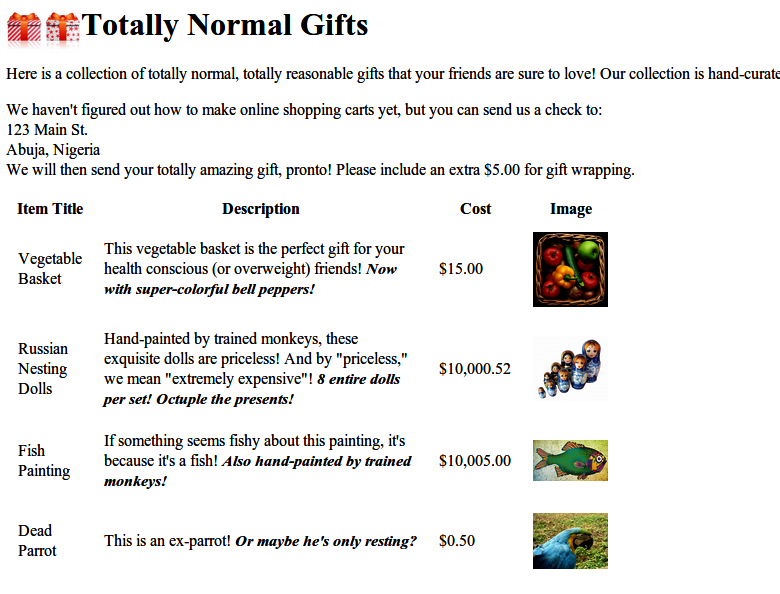

Figure 5-1. Screenshot from http://www.pythonscraping.com/pages/page3.html

The HTML for this page, mapped out as a tree (with some tags omitted for brevity), looks like this:

- HTML
    - body
        - div.wrapper
            - h1
            - div.content
            - table#giftList
                - tr
                    - th
                    - th
                    - th
                - tr.gift#gift1
                    - td
                    - td
                        - span.excitingNote
                    - td
                    - td
                        - img
                - ...table rows continue...
            - div.footer

You will use this same HTML structure as an example in the next few sections.

#### Dealing with children and other descendants

In computer science and some branches of mathematics, you often hear about horrible
things done to children: moving them, storing them, removing them, and even
killing them. Fortunately, this section focuses only on selecting them!

In the BeautifulSoup library, as well as many other libraries, there is a distinction
drawn between children and descendants: much like in a human family tree, children
are always exactly one tag below a parent, whereas descendants can be at any level in
the tree below a parent. For example, the tr tags are children of the table tag, whereas tr, th, td, img, and span are all descendants of the table tag (at least in our example page). All children are descendants, but not all descendants are children.

In general, BeautifulSoup functions always deal with the descendants of the current
tag selected. For instance, bs.body.h1 selects the first h1 tag that is a descendant of
the body tag. It will not find tags located outside the body.

Similarly, `bs.div.find_all('img')` will find the first div tag in the document, and
then retrieve a list of all img tags that are descendants of that div tag.

If you want to find only descendants that are children, you can use the .children
tag:

In [11]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

html = urlopen('http://www.pythonscraping.com/pages/page3.html')
bs = BeautifulSoup(html, 'html.parser')

for child in bs.find('table', {'id':'giftList'}).children:
    print(child)



<tr><th>
Item Title
</th><th>
Description
</th><th>
Cost
</th><th>
Image
</th></tr>


<tr class="gift" id="gift1"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
<span class="excitingNote">Now with super-colorful bell peppers!</span>
</td><td>
$15.00
</td><td>
<img src="../img/gifts/img1.jpg"/>
</td></tr>


<tr class="gift" id="gift2"><td>
Russian Nesting Dolls
</td><td>
Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
</td><td>
$10,000.52
</td><td>
<img src="../img/gifts/img2.jpg"/>
</td></tr>


<tr class="gift" id="gift3"><td>
Fish Painting
</td><td>
If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Also hand-painted by trained monkeys!</span>
</td><td>
$10,005.00
</td><td>
<img src="../img/gifts/img3.jpg"/>


This code prints the list of product rows in the giftList table, including the initial
row of column labels. If you were to write it using the descendants() function
instead of the children() function, about two dozen tags would be found within the
table and printed, including img tags, span tags, and individual td tags. It’s definitely
important to differentiate between children and descendants!

#### Dealing with siblings

The BeautifulSoup next_siblings() function makes it trivial to collect data from tables, especially ones with title rows:

In [12]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

html = urlopen('http://www.pythonscraping.com/pages/page3.html')
bs = BeautifulSoup(html, 'html.parser')

for sibling in bs.find('table', {'id':'giftList'}).tr.next_siblings:
    print(sibling)



<tr class="gift" id="gift1"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
<span class="excitingNote">Now with super-colorful bell peppers!</span>
</td><td>
$15.00
</td><td>
<img src="../img/gifts/img1.jpg"/>
</td></tr>


<tr class="gift" id="gift2"><td>
Russian Nesting Dolls
</td><td>
Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
</td><td>
$10,000.52
</td><td>
<img src="../img/gifts/img2.jpg"/>
</td></tr>


<tr class="gift" id="gift3"><td>
Fish Painting
</td><td>
If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Also hand-painted by trained monkeys!</span>
</td><td>
$10,005.00
</td><td>
<img src="../img/gifts/img3.jpg"/>
</td></tr>


<tr class="gift" id="gift4"><td>
Dead Parrot
</td><td>
This is an ex-parr

The output of this code is to print all rows of products from the product table, except
for the first title row. Why does the title row get skipped? Objects cannot be siblings
with themselves. Anytime you get siblings of an object, the object itself will not be
included in the list. As the name of the function implies, it calls next siblings only. If
you were to select a row in the middle of the list, for example, and call next_siblings
on it, only the subsequent siblings would be returned. So, by selecting the title row
and calling next_siblings, you can select all the rows in the table without selecting
the title row itself.

#### Make Selections Specific

The preceding code will work just as well if you select `bs.table.tr`
or even just `bs.tr` to select the first row of the table. However, in
the code, I go to the trouble of writing everything out in a longer
form:

`bs.find('table',{'id':'giftList'}).tr`

Even if it looks like there’s just one table (or other target tag) on the
page, it’s easy to miss things. In addition, page layouts change all
the time. What was once the first of its kind on the page might
someday be the second or third tag of that type found on the page.
To make your scrapers more robust, it’s best to be as specific as possible
when making tag selections. Take advantage of tag attributes
when they are available.

As a complement to `next_siblings`, the `previous_siblings` function often can be
helpful if there is an easily selectable tag at the end of a list of sibling tags that you
would like to get.

And, of course, there are the `next_sibling` and `previous_sibling` functions, which
perform nearly the same function as `next_siblings` and `previous_siblings`, except
they return a single tag rather than a list of them.

#### Dealing with parents

When scraping pages, you will likely discover that you need to find parents of tags
less frequently than you need to find their children or siblings. Typically, when you
look at HTML pages with the goal of crawling them, you start by looking at the top
layer of tags, and then figure out how to drill your way down into the exact piece of
data that you want. Occasionally, however, you can find yourself in odd situations
that require BeautifulSoup’s parent-finding functions, .parent and .parents. For
example:

In [13]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

html = urlopen('http://www.pythonscraping.com/pages/page3.html')
bs = BeautifulSoup(html, 'html.parser')
print(bs.find('img',
              {'src':'../img/gifts/img1.jpg'})
              .parent.previous_sibling.get_text())


$15.00



This code will print the price of the object represented by the image at the location
../img/gifts/img1.jpg (in this case, the price is $15.00).

How does this work? The following diagram represents the tree structure of the portion
of the HTML page you are working with, with numbered steps:

- `<tr>`

    - td

    - td

    - td (3)
        - "$15.00" (4)

    - td (2)
        - `<img src = "../img/gifts/img1.jpg">` (1)

### Regular Expressions

1. Write the letter a at least once.

    aa* - The letter a is written, followed by a* (read as a star), which means "any number of a's, including 0 of them." In this way, you can guarantee that the letter a is written at least once.

2. Append the letter b exactly five times

    bbbbb - No special effects here

3. Append to this the letter the letter c an even number of times. 

    (cc)* - Any even number of things can be grouped into pairs, so to enforce this rule about even things, you can write two c's, surround them with parentheses, and write an asterisk after it, meaning that you can have any number of pairs of c's (note that this can mean zero pairs, as well).

4. Write either the letter d or e at the end.

    (d|e) - Adding a bar in the middle of two expressions means that it can be "this thing or that thing". In this case, you are saying "add a d or an e". In this way, you can guarantee that there is exactly one of either these two characters.

Combining these components RegEx would look like - `aa*bbbbb(cc)*(d|e)`

#### Experimenting with RegEx

When learning how to write regular expressions, it's crucial to play around with them and get a feel for how they work. If you don't feel like firing up a code editor, writing a few lines, and running your program to see whether a regular expression works as expected, you can go to a website such as RegEx Pal, and test your regular expressions on the fly.

Table 5-1. Commonly used regular expression symbols

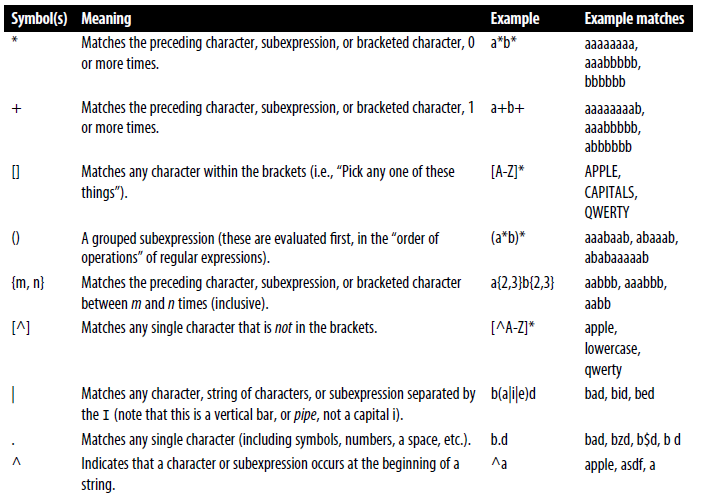

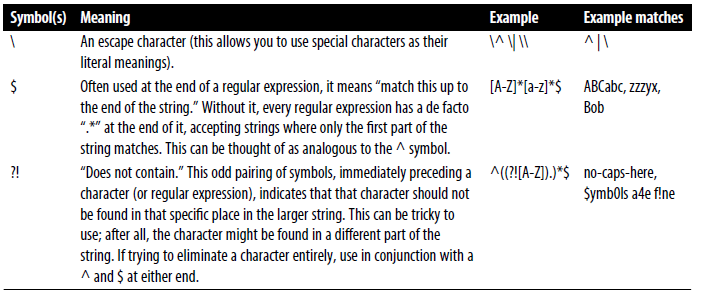

Example of RegEx using Email Addresses

1. The first part of an email address contains at least one of the following: uppercase letters, lowercase letters, the numbers 0-9, periods (.), plus signs(+), or underscores (_).

    [A-Za-z0-9._+]+      The regular expression shorthand is pretty smart. For example, it knows that "A-Z means "any uppercase letter, A through Z". By putting all these possible sequences and symbols in brackets (as opposed to parentheses), you are saying, "This symbol can be any one of these things we've listed in the brackets". Note also that the + sign means "these characters can occur as many times as they want to but must occur at least once".

2. After this, the email contains the @ symbol.

    @    This is fairly straightforward: the @ symbol must occur in the middle, and must occur exactly once.

3. The email aaddress then must contain at least one uppercase or lowercase letter.

    [A-Za-Z]+    You may use only letters, in the first part of the domain name, after the @ symbol. Also, there must be at least one character.

4. This is followed by a period(.).

    .    You must include a period (.) before the top-level domain.

5. Finally, the email address ends with com, org, edu, or net (in reality, there are many possible top-level domains, but these four should suffice for the sake of example).

    (com|org|edu|net)    This lists the possible sequences of letters that can occur after the period in the second part of an email address.

By concatenating these rules, we get this Regex: [A-Za-z0-9._+]+@[A-Za-z]+.(com|org|edu|net)

#### Regular Expressions: Not Always Regular!

The standard version of regular expressions (the one covered in
this book and used by Python and BeautifulSoup) is based on syntax
used by Perl. Most modern programming languages use this or
one similar to it. Be aware, however, that if you are using regular
expressions in another language, you might encounter problems.
Even some modern languages, such as Java, have slight differences
in the way they handle regular expressions. When in doubt, read
the docs!

### Regular Expressions and BeautifulSoup

Notice that the site has many product images, which take the following form:

`<img src="../img/gifts/img3.jpg">`

If you wanted to grab URLs of all of the product images, it might seem fairly straightforward
at first: just grab all the image tags by using .find_all("img"), right? But
there’s a problem. In addition to the obvious “extra” images (e.g., logos), modern websites often have hidden images, blank images used for spacing and aligning elements,and other random image tags you might not be aware of. Certainly, you can’t count
on the only images on the page being product images.

Let’s also assume that the layout of the page might change, or that, for whatever reason,
you don’t want to depend on the position of the image in the page in order to
find the correct tag. This might be the case when you are trying to grab specific elements
or pieces of data that are scattered randomly throughout a website. For
instance, a featured product image might appear in a special layout at the top of some
pages but not others.
The solution is to look for something identifying about the tag itself. In this case, you
can look at the file path of the product images:

In [14]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

html = urlopen('http://www.pythonscraping.com/pages/page3.html')
bs = BeautifulSoup(html, 'html.parser')
images = bs.find_all('img',
    {'src':re.compile('..\/img\/gifts/img.*.jpg')})
for image in images:
    print(image['src'])

<>:8: SyntaxWarning: invalid escape sequence '\/'
<>:8: SyntaxWarning: invalid escape sequence '\/'
/tmp/ipykernel_94511/3064599302.py:8: SyntaxWarning: invalid escape sequence '\/'
  {'src':re.compile('..\/img\/gifts/img.*.jpg')})


../img/gifts/img1.jpg
../img/gifts/img2.jpg
../img/gifts/img3.jpg
../img/gifts/img4.jpg
../img/gifts/img6.jpg


#### Accessing Attributes

With tag objects, a Python list of attributes can be automatically accessed by calling this:

`myTag.attrs`

Keep in mind that this literally returns a python dictionary object, which makes retrieval and manipulation of these attributes trivial. The source location for an image, for example, can be found using the following line

`myImgTag.attrs[src]`

### Lambda Expressions

In [15]:
def square(n):
    return n**2

We could use a lambda function to do the same thing in one line:

In [16]:
square = lambda n: n**2

In [17]:
lambda r: r**2

<function __main__.<lambda>(r)>

The most common use of lambda function is an argument passed in to other functions. BeautifulSoup allows you to pass certain types of functions as parameters into the `find_all` function.

The only restriction is that these functions must take a tag object as an argument and
return a boolean. Every tag object that BeautifulSoup encounters is evaluated in this
function, and tags that evaluate to True are returned, while the rest are discarded.

For example, the following retrieves all tags that have exactly two attributes:

In [18]:
bs.find_all(lambda tag: len(tag.attrs) == 2)

[<img src="../img/gifts/logo.jpg" style="float:left;"/>,
 <tr class="gift" id="gift1"><td>
 Vegetable Basket
 </td><td>
 This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
 <span class="excitingNote">Now with super-colorful bell peppers!</span>
 </td><td>
 $15.00
 </td><td>
 <img src="../img/gifts/img1.jpg"/>
 </td></tr>,
 <tr class="gift" id="gift2"><td>
 Russian Nesting Dolls
 </td><td>
 Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
 </td><td>
 $10,000.52
 </td><td>
 <img src="../img/gifts/img2.jpg"/>
 </td></tr>,
 <tr class="gift" id="gift3"><td>
 Fish Painting
 </td><td>
 If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Also hand-painted by trained monkeys!</span>
 </td><td>
 $10,005.00
 </td><td>
 <img src="../img/gifts/img3.jpg"/>
 </td>

Here, the function that you are passing as the argument is len(tag.attrs) == 2.
Where this is True, the find_all function will return the tag. That is, it will find tags
with two attributes, such as shown above.

Lambda functions are so useful you can even use them to replace existing BeautifulSoup functions:

In [19]:
bs.find_all('', text='Or maybe he\'s only resting')

/tmp/ipykernel_94511/602917199.py:1: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  bs.find_all('', text='Or maybe he\'s only resting')


[]

This also can be accomplished without a lambda function:

In [20]:
bs.find_all('', text='Or maybe he\'s only resting')

/tmp/ipykernel_94511/602917199.py:1: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  bs.find_all('', text='Or maybe he\'s only resting')


[]

However, if you remember the syntax of the lambda function, and how to access tag properties, you may never need to remember any other BeautifulSoup syntax again!

Because the provided lambda function can be any function that returns a True or False value, you can even combine them with regular expressions to find tags with an attribute matching a certain string pattern.